In [1]:
import pandas as pd
import sklearn.ensemble as sken
import numpy as np
import sklearn.metrics as mts
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
# df = pd.read_csv('https://raw.githubusercontent.com/thecodizt/Datasets/main/music_processed_data_encoded.csv')
df= pd.read_csv('data.csv')

In [3]:
type(df.genre_id[0])

numpy.int64

In [4]:
df

,Unnamed: 0,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,artist_name,composer,lyricist,language,genre_id,city,bd,gender,registered_via,registration_init_time,expiration_date
0,0,273,7641,3,8,4,1,229982,129,3782,3496,31.0,465,13,24,0,9,20110525,20170911
1,1,273,2363,3,8,3,1,224597,1640,4781,4522,3.0,465,13,24,0,9,20110525,20170911
2,2,273,4711,3,8,3,0,210364,1947,1745,2448,3.0,465,13,24,0,9,20110525,20170911
3,3,273,1892,3,8,3,1,240624,1322,1330,1705,31.0,465,13,24,0,9,20110525,20170911
4,4,273,9121,3,8,3,1,248685,1890,5744,5726,3.0,465,13,24,0,9,20110525,20170911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74154,74154,294,9309,0,11,6,0,231653,127,3785,3492,31.0,444,6,20,0,9,20090225,20170807
74155,74155,201,9531,2,12,2,0,200385,249,798,741,52.0,465,4,29,1,3,20120520,20180626
74156,74156,56,10543,0,11,6,0,214726,1157,3111,2878,52.0,465,11,48,0,9,20090313,20170811
74157,74157,56,594,0,11,6,0,221544,1240,209,185,52.0,1609,11,48,0,9,20090313,20170811


In [5]:
df.drop(columns='Unnamed: 0',inplace=True)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['target','genre_id']),df['target'],test_size=0.2)

In [7]:
clf = CatBoostClassifier()

In [8]:
clf.fit(x_train, y_train)

Learning rate set to 0.0589
0:	learn: 0.6870519	total: 186ms	remaining: 3m 5s
1:	learn: 0.6816234	total: 208ms	remaining: 1m 43s
2:	learn: 0.6767585	total: 231ms	remaining: 1m 16s
3:	learn: 0.6724057	total: 255ms	remaining: 1m 3s
4:	learn: 0.6684975	total: 276ms	remaining: 54.9s
5:	learn: 0.6649309	total: 297ms	remaining: 49.2s
6:	learn: 0.6619537	total: 315ms	remaining: 44.7s
7:	learn: 0.6590043	total: 339ms	remaining: 42s
8:	learn: 0.6562126	total: 362ms	remaining: 39.8s
9:	learn: 0.6540802	total: 383ms	remaining: 37.9s
10:	learn: 0.6519921	total: 405ms	remaining: 36.4s
11:	learn: 0.6501800	total: 428ms	remaining: 35.3s
12:	learn: 0.6484514	total: 450ms	remaining: 34.2s
13:	learn: 0.6467736	total: 473ms	remaining: 33.3s
14:	learn: 0.6453262	total: 493ms	remaining: 32.4s
15:	learn: 0.6439045	total: 513ms	remaining: 31.6s
16:	learn: 0.6425706	total: 534ms	remaining: 30.9s
17:	learn: 0.6413841	total: 556ms	remaining: 30.3s
18:	learn: 0.6401371	total: 575ms	remaining: 29.7s
19:	learn: 0.

In [9]:
predicted = clf.predict(x_test)

In [10]:
mts.accuracy_score(y_test,predicted)

0.7177723840345199

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:

cat_param = {"n_estimators":[50,100,300,500,1000],"max_depth":[3,5,7],"subsample":[0.5,0.8,1],"learning_rate":[0.1,0.01,0.3]}



In [13]:
cat_cv = GridSearchCV(clf, cat_param, cv=3, n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 3 folds for each of 135 candidates, totalling 405 fits
0:	learn: 0.6823075	total: 15ms	remaining: 15s
1:	learn: 0.6741050	total: 32.6ms	remaining: 16.3s
2:	learn: 0.6666281	total: 46.2ms	remaining: 15.4s
3:	learn: 0.6599205	total: 62.9ms	remaining: 15.7s
4:	learn: 0.6546593	total: 74.8ms	remaining: 14.9s
5:	learn: 0.6497880	total: 87.2ms	remaining: 14.4s
6:	learn: 0.6462750	total: 98.2ms	remaining: 13.9s
7:	learn: 0.6424904	total: 109ms	remaining: 13.5s
8:	learn: 0.6390940	total: 120ms	remaining: 13.3s
9:	learn: 0.6366028	total: 131ms	remaining: 13s
10:	learn: 0.6346721	total: 142ms	remaining: 12.8s
11:	learn: 0.6323002	total: 153ms	remaining: 12.6s
12:	learn: 0.6298866	total: 163ms	remaining: 12.4s
13:	learn: 0.6281611	total: 173ms	remaining: 12.2s
14:	learn: 0.6269079	total: 183ms	remaining: 12s
15:	learn: 0.6251646	total: 193ms	remaining: 11.9s
16:	learn: 0.6241562	total: 205ms	remaining: 11.8s
17:	learn: 0.6226899	total: 217ms	remaining: 11.8s
18:	learn: 0.6215913	total: 22

In [14]:
cat_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000, 'subsample': 0.8}

In [15]:
clf = CatBoostClassifier(learning_rate=0.1,max_depth=7,n_estimators=1000,subsample=1)

In [16]:
clf.fit(x_train,y_train)

0:	learn: 0.6821264	total: 15.6ms	remaining: 15.6s
1:	learn: 0.6737205	total: 29ms	remaining: 14.5s
2:	learn: 0.6670097	total: 41.4ms	remaining: 13.8s
3:	learn: 0.6609247	total: 53.6ms	remaining: 13.3s
4:	learn: 0.6556321	total: 66.9ms	remaining: 13.3s
5:	learn: 0.6503232	total: 84.3ms	remaining: 14s
6:	learn: 0.6461400	total: 98.3ms	remaining: 13.9s
7:	learn: 0.6416915	total: 110ms	remaining: 13.7s
8:	learn: 0.6380290	total: 122ms	remaining: 13.5s
9:	learn: 0.6354208	total: 134ms	remaining: 13.3s
10:	learn: 0.6335486	total: 147ms	remaining: 13.2s
11:	learn: 0.6316897	total: 160ms	remaining: 13.2s
12:	learn: 0.6293178	total: 173ms	remaining: 13.2s
13:	learn: 0.6275102	total: 187ms	remaining: 13.2s
14:	learn: 0.6260963	total: 200ms	remaining: 13.1s
15:	learn: 0.6247540	total: 214ms	remaining: 13.1s
16:	learn: 0.6236215	total: 227ms	remaining: 13.1s
17:	learn: 0.6227018	total: 240ms	remaining: 13.1s
18:	learn: 0.6216430	total: 253ms	remaining: 13.1s
19:	learn: 0.6196022	total: 266ms	rema

In [17]:
predicted = clf.predict(x_test)

In [18]:
mts.accuracy_score(y_test,predicted)

0.7267394822006472

In [19]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      6411
           1       0.74      0.79      0.77      8421

    accuracy                           0.73     14832
   macro avg       0.72      0.72      0.72     14832
weighted avg       0.73      0.73      0.72     14832



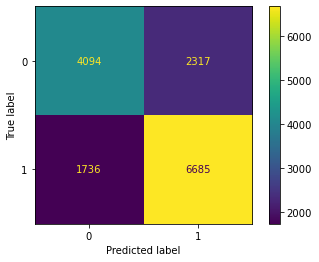

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test,predicted)

In [23]:
import pickle 
filename = 'catboost_model'
pickle.dump(clf,open(filename,'wb'))

In [24]:
loaded_model= pickle.load(open(filename,'rb'))